In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
datos = pd.read_csv('./posicion_salarios.csv',sep=';')
datos

,Posistion,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultatnt,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
x = datos.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [8]:
y = datos.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Posistion  10 non-null     object
 1   Level      10 non-null     int64 
 2   Salary     10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [12]:
datos_num = datos[['Level','Salary']]
datos_num

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [13]:
datos_num.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [15]:
# Modelo de regresion lineal multiple
reg_lin = LinearRegression()
reg_lin.fit(x,y)
y_pred = reg_lin.predict(x)

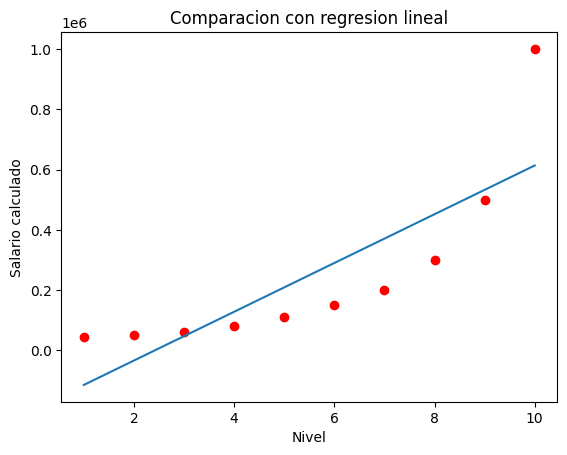

In [18]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred)
plt.title('Comparacion con regresion lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario calculado');

In [50]:
# Establecer grado del polinomio
reg_poly = PolynomialFeatures(degree=7) # Ir buscando el mas optimo
# Transformar las variables al grado del polinomio establecido
x_ploly = reg_poly.fit_transform(x)
x_ploly

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01, 6.400000e+01, 1.280000e+02],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02, 7.290000e+02, 2.187000e+03],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03, 4.096000e+03, 1.638400e+04],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03, 1.562500e+04, 7.812500e+04],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03, 4.665600e+04, 2.799360e+05],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04, 1.176490e+05, 8.235430e+05],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+0

In [51]:
# Declarar regresion lineal 2
reg_lin2 = LinearRegression()
reg_lin2.fit(x_ploly,y)
y_pred2 = reg_lin2.predict(x_ploly)

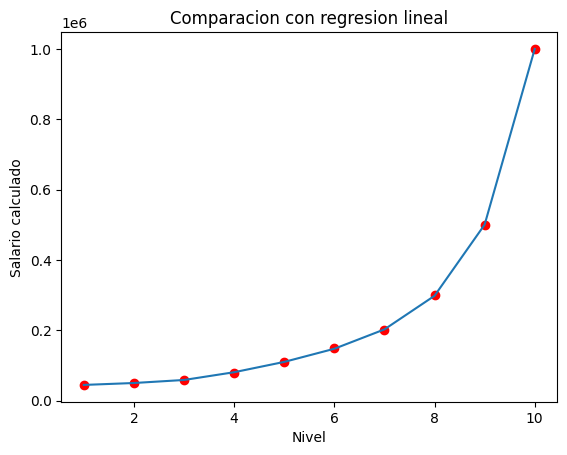

In [52]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred2)
plt.title('Comparacion con regresion lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario calculado');

In [53]:
print(r2_score(y,y_pred2))

0.9999770143729169


In [54]:
reg_lin2.coef_

array([ 0.00000000e+00,  2.19873967e+05, -1.85592746e+05,  7.84479969e+04,
       -1.79569040e+04,  2.32626639e+03, -1.61070264e+02,  4.69771249e+00])

In [55]:
reg_lin2.intercept_

-52000.00254500285

In [56]:
# Probar el modelo
nivel = float(input('Ingrese el nivel'))
reg_lin2.predict(reg_poly.fit_transform([[nivel]]))

array([110354.17530066])

In [57]:
datos

,Posistion,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultatnt,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000
